In [1]:
'''
Linear regression formula: y = w0 + w1 * X, w0 = y axis 
and w1 = weight coefficient of explanatory variable.
'''
from __future__ import print_function
# Housing dataset
with open('housing_data.txt', 'r') as fh:
    for line in fh:
        line = line.rstrip("\n")
        print(line)

0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20
 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70
 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90
 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10
 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50
 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90
 0.22489  12.50   7.870  0  0.5

In [2]:
# Each column of data is represented as such, from left to right:
"""
CRIME: Crime rate per town per capita
LAND_ZONE: Residential land zoneed for lots over 25,000 square feet
BUSINESS: Non-retail business acres per town
CHARLES_DUMMY: Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
NITRIC_ACID: Nitric oxide concentration
ROOMS: Avg number of rooms per dwelling
AGE: Owner occupied units built prior to 1940
DISTANCES: Weighted distances to five Boston employment centers
RADIAL: Index of accessibility to radial highways
PROPERTY_TAX: Full value property tax
PUPIL_TEACHER_RATIO: Pupil-teacher ratio by town
B: 1000(Bk - 0.63)^2, where Bk is the proportion of [people of African American Descent] by town.
LOWER_STATUS: Percentage of lower status of the population
MEDIAN_VALUE_PROPERTY: Median value of owner-occupied homes in $1000s
"""

'\nCRIME: Crime rate per town per capita\nLAND_ZONE: Residential land zoneed for lots over 25,000 square feet\nBUSINESS: Non-retail business acres per town\nCHARLES_DUMMY: Charles River dummy variable (=1 if tract bounds river; 0 otherwise)\nNITRIC_ACID: Nitric oxide concentration\nROOMS: Avg number of rooms per dwelling\nAGE: Owner occupied units built prior to 1940\nDISTANCES: Weighted distances to five Boston employment centers\nRADIAL: Index of accessibility to radial highways\nPROPERTY_TAX: Full value property tax\nPUPIL_TEACHER_RATIO: Pupil-teacher ratio by town\nB: 1000(Bk - 0.63)^2, where Bk is the proportion of [people of African American Descent] by town.\nLOWER_STATUS: Percentage of lower status of the population\nMEDIAN_VALUE_PROPERTY: Median value of owner-occupied homes in $1000s\n'

In [3]:
# Our target variable is the house prices, that is: MEDIAN_VALUE_PROPERTY
import pandas as pd


data_frame = pd.read_csv('housing_data.txt', header = None, sep = '\s+')
data_frame.columns = ['CRIME', 'LAND_ZONE', 'BUSINESS', 'CHARLES_DUMMY', 'NITRIC_ACID', 'ROOMS', 
                     'AGE', 'DISTANCES', 'RADIAL', 'PROPERTY_TAX', 'PUPIL_TEACHER_RATIO', 'B', 
                      'LOWER_STATUS', 'MEDIAN_VALUE_PROPERTY']


data_frame

,CRIME,LAND_ZONE,BUSINESS,CHARLES_DUMMY,NITRIC_ACID,ROOMS,AGE,DISTANCES,RADIAL,PROPERTY_TAX,PUPIL_TEACHER_RATIO,B,LOWER_STATUS,MEDIAN_VALUE_PROPERTY
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


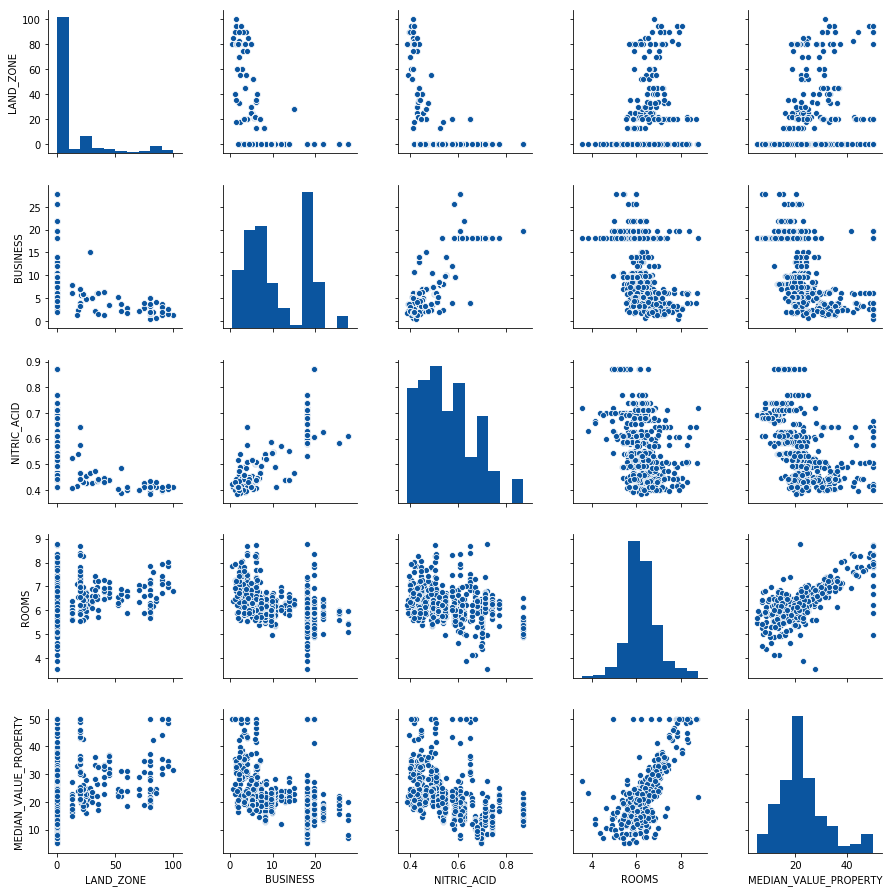

In [4]:
"""
We will now use pairplot from the Seaborn library which allows us to 
draw statistical plots based on Matplotlib. Once we visualise the data
it would be easier to detect outliers
"""
import matplotlib.pyplot as plt
import seaborn as sea
# Can be changed to other columns as well.
columns_new = ['LAND_ZONE', 'BUSINESS', 'NITRIC_ACID', 'ROOMS', 'MEDIAN_VALUE_PROPERTY']
sea.set_palette("Blues_r")
sea.pairplot(data_frame[columns_new], height = 2.5)
plt.tight_layout()
plt.show()

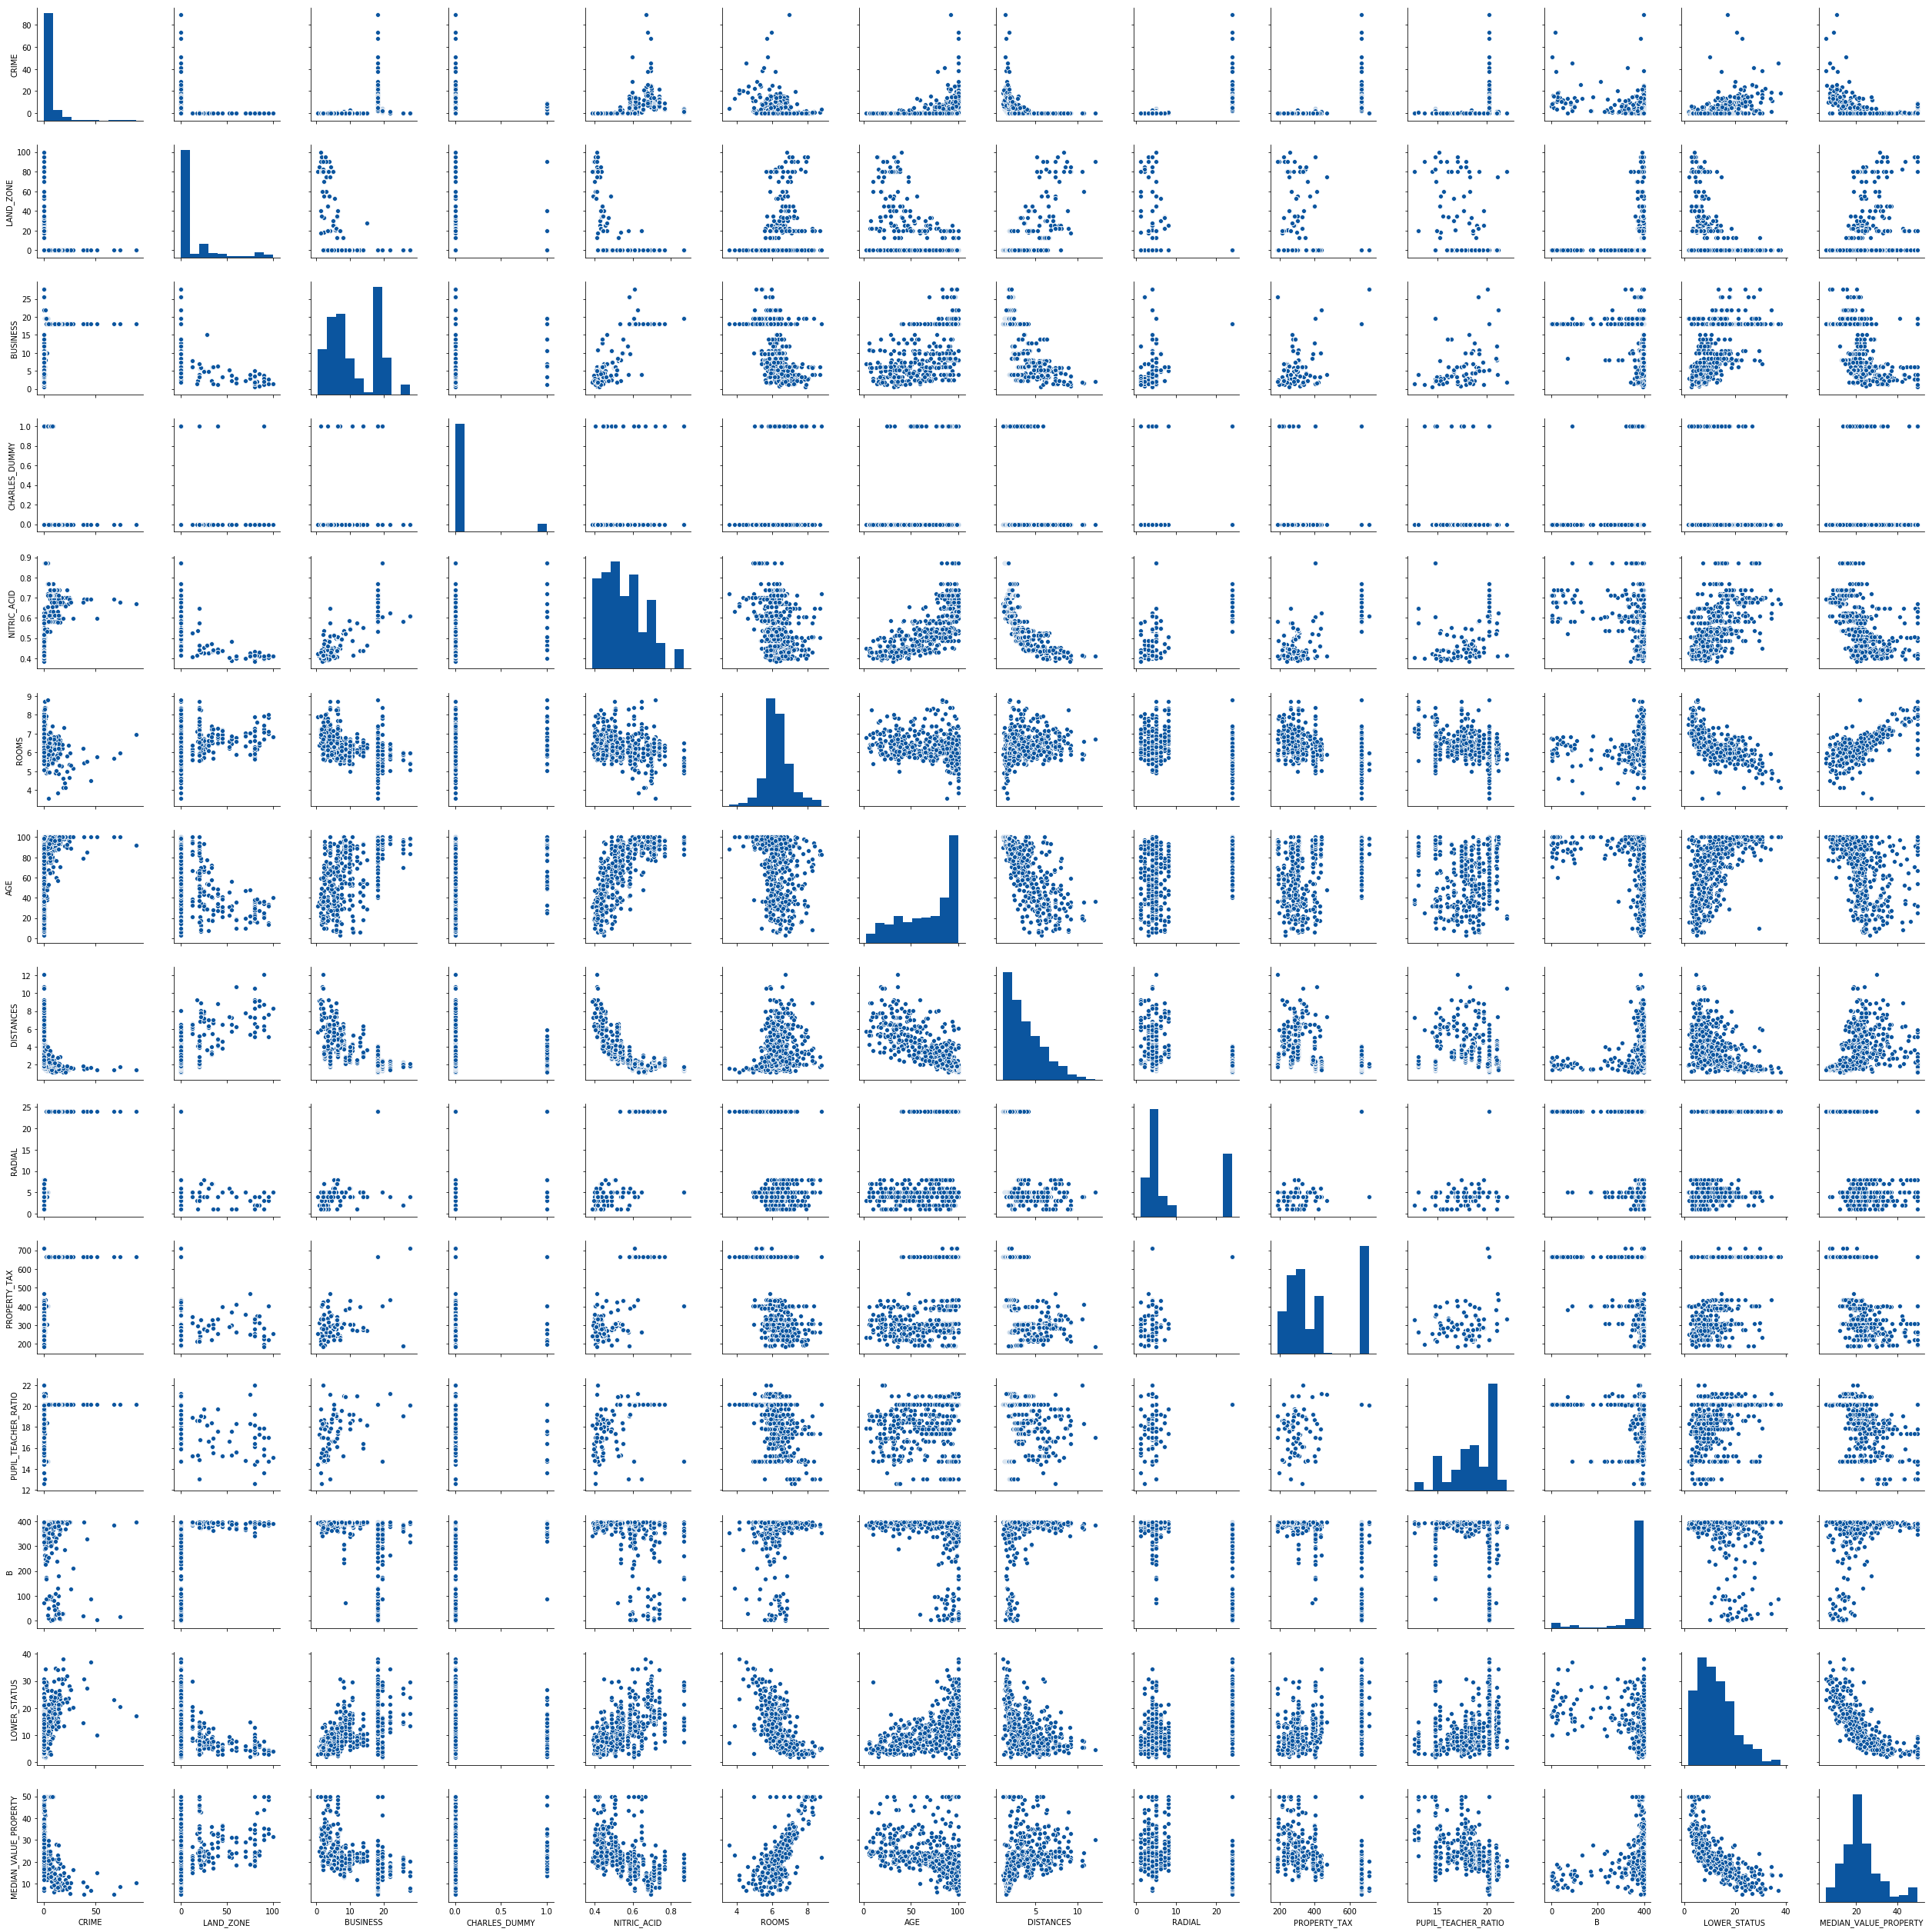

In [5]:
# The entire dataset
sea.set_palette("Blues_r")
sea.pairplot(data_frame)
plt.tight_layout()
plt.show()

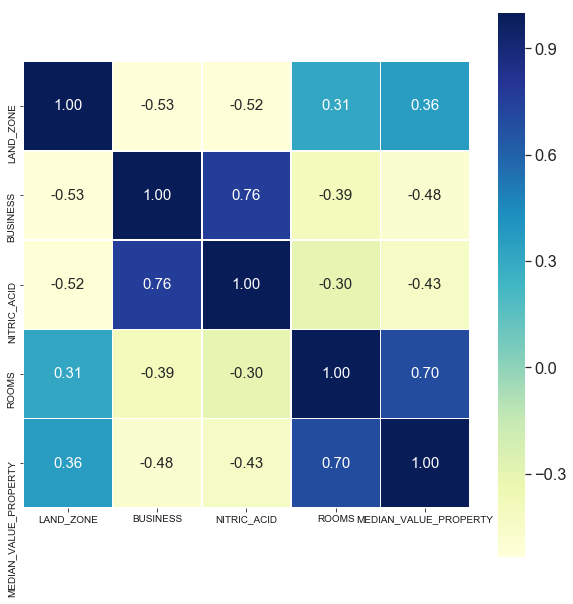

In [6]:
# We will now create a correlation matrix to quantify linear relationships.
'''
We now use Numpy corrcoef function on the columns we used to create the 
seaborn scatterplot, we'll then use seaborns heatmap to plot the correlation 
matrix array. 
'''
import numpy as np


#Increase the size of the heat map.
fig, ax = plt.subplots(figsize=(10,10)) 
data = np.corrcoef(data_frame[columns_new].values.T)
sea.set(font_scale = 1.5)
heat_map = sea.heatmap(data, cbar = True, annot = True, square = True, 
                      fmt = '.2f', annot_kws = {'size' : 15}, yticklabels = columns_new, 
                      xticklabels = columns_new, cmap = "YlGnBu", linewidths=.5, ax=ax)


plt.show()

In [7]:
'''
There is a clear linear relationship between ROOMS and MEDIAN_VALUE_PROPERTY (0.70)
this makes RM a good choice for the explanatory variable. The gradient descent (GD) 
algorithm can be applied. A simple linear regression model will now be implemented.

ADD PICTURE OF FORMULA HERE!
'''

class Simple_Linear_Regression_SLR:
    
    
    def __init__(self, eta = 0.001, n_iteration = 20):
        self.eta = eta
        self.n_iteration = n_iteration
    
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iteration):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        return self.net_input(X)

In [8]:
'''
Now that we implemented the SimpleLinearRegression algorithm,
we will use ROOMS as the explanatory variable to predict house prices
MEDIAN_VALUE_PROPERTY
'''
from sklearn.preprocessing import StandardScaler
X = data_frame[['ROOMS']].values
y = data_frame['MEDIAN_VALUE_PROPERTY'].values
standard_scalar_x = StandardScaler()
standard_scalar_y = StandardScaler()
X_std = standard_scalar_x.fit_transform(X)
y_std = standard_scalar_y.fit_transform(y[:, np.newaxis]).flatten()

In [9]:
linear_regression = Simple_Linear_Regression_SLR()
linear_regression.fit(X_std, y_std)

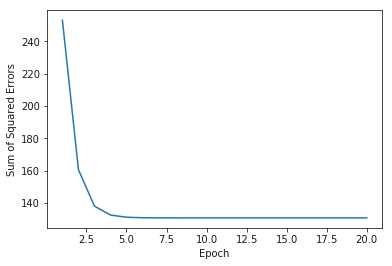

In [10]:
# Resets matplotlib style
'''
It's clear that the simple_linear_regression algorithm converged at the 5th epoch.
'''
sea.reset_orig()
plt.plot(range(1, linear_regression.n_iteration + 1), linear_regression.cost_)
plt.ylabel('Sum of Squared Errors')
plt.xlabel('Epoch')
plt.show()

In [11]:
'''
Now we have enough material to visualise how well the 
linear regression line fits the training data. I will
now implement a simple scatterplot to visualise.
'''
def line_regular_plot(X, y, model):
    plt.scatter(X, y, color = ['red', 'blue'], edgecolor = 'white', s = 70)
    plt.plot(X, model.predict(X), color = 'black', lw = 2)
    return None

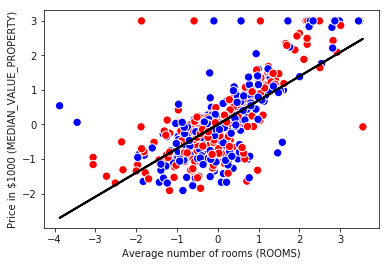

In [12]:
'''
Now the line_regular_plot will be used to plot the number of rooms against the house prices
'''
line_regular_plot(X_std, y_std, linear_regression)
plt.xlabel('Average number of rooms (ROOMS)')
plt.ylabel('Price in $1000 (MEDIAN_VALUE_PROPERTY)')
plt.show()

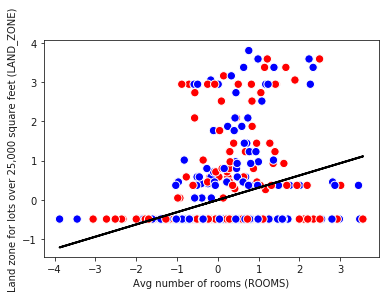

In [13]:
'''
It's now clear from the scatter plot above that house 
prices do increase as the number of rooms increase.
'''

# Now I will plot the rooms against land zone
X_1 = data_frame[['ROOMS']].values
y_1 = data_frame['LAND_ZONE'].values
standard_scalar_x_1 = StandardScaler()
standard_scalar_y_1 = StandardScaler()
X_std_1 = standard_scalar_x_1.fit_transform(X_1)
y_std_1 = standard_scalar_y_1.fit_transform(y_1[:, np.newaxis]).flatten()
linear_regression.fit(X_std_1, y_std_1)
line_regular_plot(X_std_1, y_std_1, linear_regression)
plt.xlabel('Avg number of rooms (ROOMS)')
plt.ylabel('Land zone for lots over 25,000 square feet (LAND_ZONE)')
plt.show()

In [14]:
'''
From the plot above, it is clear that as room numbers 
increase the land zone also increases. After 2 rooms, not much changes though.
'''
# Now lets make some simple predictions. If our house has 10 rooms, what is the predicted price
number_of_rooms = standard_scalar_x.transform(10.0)
price = linear_regression.predict(number_of_rooms)
print("Price in $1000s: %.3f" % \
      standard_scalar_y.inverse_transform(price))

Price in $1000s: 37.706


In [15]:
'''
We made a simple prediction, according to our data. A house with 10 rooms is 
estimated to cost roughly $37.706
'''
# We will no perform statistical tests to detect outliers. We will perform the iterative RANSAC algorithm:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac = RANSACRegressor(LinearRegression(),
                        max_trials = 100,
                        min_samples = 50,
                        loss = 'absolute_loss',
                        residual_threshold = 5.0,
                        random_state = 0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

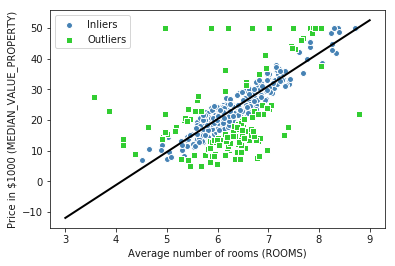

In [16]:
'''
We use ransac to create a new scatter with a legend indicating which points are outliers and which are inliers.
'''
inlier = ransac.inlier_mask_
outlier = np.logical_not(inlier)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier], y[inlier], c = 'steelblue', edgecolor = 'white',
           marker = 'o', label ='Inliers')
plt.scatter(X[outlier], y[outlier], c = 'limegreen', edgecolor = 'white',
           marker = 's', label ='Outliers')
plt.plot(line_X, line_y_ransac, color = 'black', lw = 2)
plt.xlabel('Average number of rooms (ROOMS)')
plt.ylabel('Price in $1000 (MEDIAN_VALUE_PROPERTY)')
plt.legend(loc = 'upper left')
plt.show()

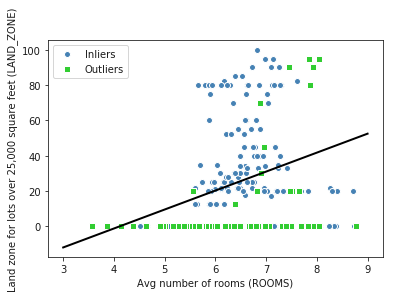

In [17]:
inlier_1 = ransac.inlier_mask_
outlier_1 = np.logical_not(inlier)
line_X_1 = np.arange(3, 10, 1)
line_y_ransac_1 = ransac.predict(line_X_1[:, np.newaxis])
plt.scatter(X_1[inlier], y_1[inlier], c = 'steelblue', edgecolor = 'white',
           marker = 'o', label ='Inliers')
plt.scatter(X_1[outlier], y_1[outlier], c = 'limegreen', edgecolor = 'white',
           marker = 's', label ='Outliers')
plt.plot(line_X_1, line_y_ransac_1, color = 'black', lw = 2)
plt.xlabel('Avg number of rooms (ROOMS)')
plt.ylabel('Land zone for lots over 25,000 square feet (LAND_ZONE)')
plt.legend(loc = 'upper left')
plt.show()

In [18]:
#We will use LASSO as a feature selection technique.
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge(alpha = 1.0)
# The regularisation strength is regulated by alpha.
lasso = Lasso(alpha = 1.0)
# ElasticNet allows us to vary the L1 to L2 ratio.
elastic_net = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [26]:
'''
The final section of this coursework, I will now implement polynomial 
terms using the sklearn.preprocessing Polynomial Features. This will be used
to model non-linear relationships in the housing data. I am referencing the book: Python Machine Learning
by Sebastian Raschka and Vahid Mirjalili Second Edition, Chapter 10 for this part
'''
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = data_frame[['DISTANCES']].values
y = data_frame['AGE'].values

regression = LinearRegression()

# Creating the quadratic features
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quadratic = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Feature fitting
X_fit = np.arange(X.min(), X.max(), 1) [:, np.newaxis]
regression = regression.fit(X, y)
y_linear_fit = regression.predict(X_fit)
linear_r2 = r2_score(y, regression.predict(X))

regression = regression.fit(X_quadratic, y)
y_quadratic_fit = regression.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regression.predict(X_quadratic))

regression = regression.fit(X_cubic, y)
y_cubic_fit = regression.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regression.predict(X_cubic))
